# Fatal bicycle-car accidents, 2017

The [National Highway Traffic Safety Administration](https://www.nhtsa.gov/) (NHTSA) compiles annual data concerning a wide range of highway transportation issues.  One such database is the [Fatality Analysis Reporting System](https://www-fars.nhtsa.dot.gov/QueryTool/QuerySection/SelectYear.aspx) (FARS). We will dive into a subset of the 2017 FARS data to explore common causes of fatal bicycle-car interactions and then propose a potential solution, experimental design to test our solution, and some key success indicators.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bikes = pd.read_csv('2017_US_Bicycle_Fatalities.csv')

bikes.head()

,statenum,casenum,vnumber,pnumber,atmcond2,county,accday,acchr,accmon,caseyear,dayofweek,holiday,numfatal,speeding,bikedirection,bikeposition,crashlocation,crashtype
0,1,27,0,1,0,83,12,20,1,2017,5,0,1,0,1,1,3,231
1,1,359,0,1,0,121,16,21,6,2017,6,0,1,0,1,1,3,231
2,1,365,0,1,0,97,18,21,6,2017,1,0,1,0,1,1,3,129
3,1,448,0,1,0,83,6,8,8,2017,1,0,1,0,1,1,3,231
4,1,485,0,1,0,73,11,22,7,2017,3,0,1,0,1,1,3,255


In [3]:
bikes.describe()

,statenum,casenum,vnumber,pnumber,atmcond2,county,accday,acchr,accmon,caseyear,dayofweek,numfatal,speeding,bikedirection,bikeposition,crashlocation,crashtype
count,807.000000,807.000000,807.0,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.0,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,23.944238,942.060719,0.0,1.029740,0.022305,85.515489,16.090458,14.525403,6.781908,2017.0,4.091698,1.008674,0.084263,2.043371,1.452292,2.415118,274.266419
std,15.932180,906.339277,0.0,0.203219,0.378712,100.849663,8.763532,10.743526,3.250046,0.0,1.961545,0.092788,0.277954,2.253060,1.270935,1.079895,197.151161
min,1.000000,2.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2017.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,12.000000,285.000000,0.0,1.000000,0.000000,29.000000,8.000000,8.000000,4.000000,2017.0,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,212.000000
50%,21.000000,599.000000,0.0,1.000000,0.000000,63.000000,17.000000,15.000000,7.000000,2017.0,4.000000,1.000000,0.000000,1.000000,1.000000,3.000000,231.000000
75%,37.000000,1371.000000,0.0,1.000000,0.000000,103.000000,23.000000,19.000000,9.000000,2017.0,6.000000,1.000000,0.000000,2.000000,1.000000,3.000000,250.000000
max,55.000000,3393.000000,0.0,4.000000,10.000000,810.000000,31.000000,99.000000,12.000000,2017.0,7.000000,2.000000,1.000000,9.000000,9.000000,9.000000,980.000000


Lots of data here, but all of it is coded.  The date-related columns (accday, acchr, accmon, dayofweek) are all easy to parse by intuition, however, the rest need to be decoded via the FARS metadata tables.  I will occasionally explicitly decode some of the data in this EDA, where neccessary.  Other times I will only make comments to what the codes mean, and give a general sense of the major common accident themes.

In [4]:
# Break out number of fatal accidents by sub-group.
state = bikes.groupby('statenum')['numfatal'].sum().reset_index(drop=False)
month = bikes.groupby('accmon')['numfatal'].sum().reset_index(drop=False)
hour = bikes.groupby('acchr')['numfatal'].sum().reset_index(drop=False)
day_of_week = bikes.groupby('dayofweek')['numfatal'].sum().reset_index(drop=False)

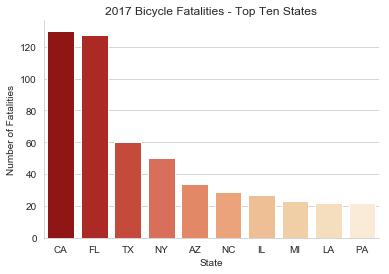

In [5]:
# Plot top ten states by number of fatalities.
top_ten_states = state.nlargest(10, 'numfatal')
top_ten_states['state'] = ['CA', 'FL', 'TX', 'NY', 'AZ', 
                           'NC', 'IL', 'MI', 'LA', 'PA']
tts_list = list(top_ten_states.state.values)

sns.set_style('whitegrid')

sns.barplot(x='state', y='numfatal', data=top_ten_states, 
            order=tts_list, palette='OrRd_r', ci=False)
plt.title('2017 Bicycle Fatalities - Top Ten States')
plt.xlabel('State')
plt.ylabel('Number of Fatalities')
sns.despine()
plt.show()


California and Florida had significantly more bicylists die than the other states. The nice weather probably plays a role here. I would guess that these states have higher biker rates than the others.  

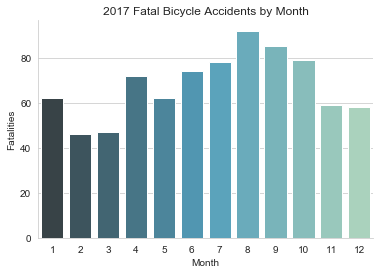

In [6]:
# Deaths by month.
sns.barplot(x='accmon', y='numfatal', 
            data=month, palette='GnBu_d')
plt.title('2017 Fatal Bicycle Accidents by Month')
plt.ylabel('Fatalities')
plt.xlabel('Month')
sns.despine()
plt.show()

The deaths by month trend most certainly highlights a weather/cycling-rate dynamic.  More people bike in the summer and early fall than they do in winter.

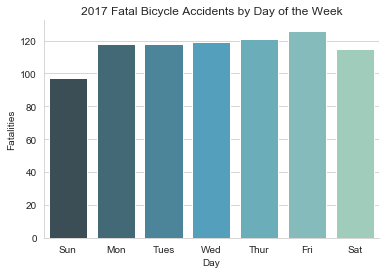

In [7]:
# Fatalities by day of the week.
day_of_week['day'] = ['Sun', 'Mon', 'Tues', 'Wed', 
                    'Thur', 'Fri', 'Sat']

sns.barplot(x='day', y='numfatal', 
            data=day_of_week, palette='GnBu_d')
plt.title('2017 Fatal Bicycle Accidents by Day of the Week')
plt.ylabel('Fatalities')
plt.xlabel('Day')
sns.despine()
plt.show()

Interestingly, less cyclists are killed on the weekends than during the week.  This suggests that commuters may be be the largest demographic of cyclists killed.

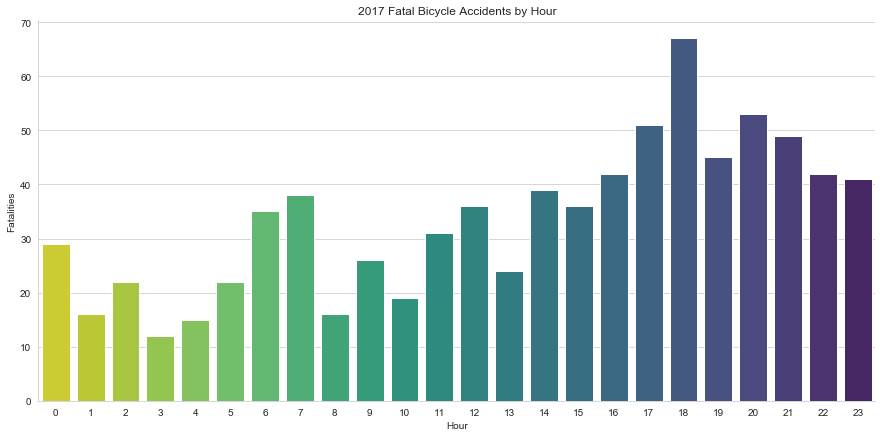

In [8]:
# Plot fatalities by hour.
plt.figure(figsize=(15,7))
sns.barplot(x='acchr', y='numfatal', data=hour, palette='viridis_r')
plt.title('2017 Fatal Bicycle Accidents by Hour')
plt.ylabel('Fatalities')
plt.xlabel('Hour')
plt.xlim(-0.5,23.5)
sns.despine()
plt.show()

Plotted by hour, we can definitely see two spikes corresponding with the morning and evening rush hours.  We also note that more of these accidents occur at night.  That morning commute spike seems unusually short though - morning rush hour, in my opinion, is from 6-9am.  Looks like that increase in cyclist fatalities corresponds specifically to the dark/dawn/'bright-sun-right-in-my-eyes' portion of the morning commute.  

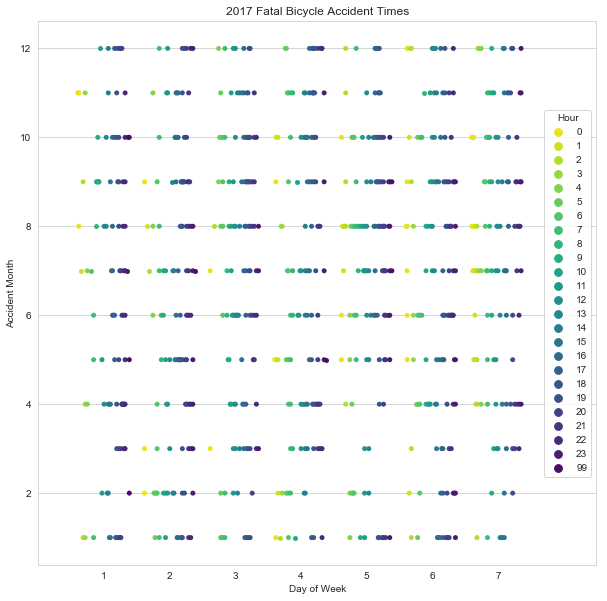

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,10))
sns.swarmplot(x='dayofweek', y='accmon', hue='acchr', dodge=True,
              data=bikes, palette='viridis_r')
plt.title('2017 Fatal Bicycle Accident Times')
plt.ylabel('Accident Month')
plt.xlabel('Day of Week')
plt.xlim(-1,7.5)
plt.legend(title='Hour', loc=5)
plt.show()

Here's a summary swarmplot which shows all fatal bike accidents in 2017.  As we've walked through above, you can see relatively few accidents in the winter with a dramatic increase in summer and fall. The commute times are the biggest contributors in the winter while the summer months have fatal accidents at all times of the day. The main time, year-round, for fatal accidents is the evening/night.

Now that we have a good feel for the temporal aspect of these accidents, let's look at some spatial context.  Where were the cyclists, which direction were they going, and some broader context.

In [10]:
bikes['bikeposition'].value_counts()

1    645
3     79
2     64
9     12
8      6
6      1
Name: bikeposition, dtype: int64

Bicyclist position at the time of each accident is predominantly in the Travel lane. In order, the top three locations are:
1. Travel lane
2. Sidewalk/crosswalk
3. Bike lane / paved shoulder


In [11]:
bikes['bikedirection'].value_counts()

1    538
2    122
3     76
9     71
Name: bikedirection, dtype: int64

Bikers travelling with traffic (#1) - the correct direction to ride - were involved in 4 times more fatal accidents than those riding against traffic (#2).

In [12]:
bikes['crashlocation'].value_counts()

3    508
1    224
2     67
9      7
4      1
Name: crashlocation, dtype: int64

Fatal accidents involving bikes happened primarily on a normal roadway (#3) while accidents at or related to an intersection (#1 & \#2) occurred about half as often.

In [13]:
bikes['crashtype'].value_counts()[:10]

239    120
231     90
221     50
970     45
232     44
280     43
155     42
250     39
318     32
144     28
Name: crashtype, dtype: int64

This is the hardest data to decode because there are more than 80 different categories that a crash could be assigned.  To give a few examples of the type of information we can glean from this category here are the top 5 fatal accident categories:

1. Motorist Overtaking - Other/ Unknown
2. Motorist Overtaking - Undetected Bicyclist
3. Bicyclist Left Turn - Same Direction
4. Unknown Approach Paths
5. Motorist Overtaking - Misjudged Space

So just by looking at the top 5 crash types, we can see that the vehicle driver is to blame a large percentage of the time.  Additionally, we've seen that most fatal accidents happen in poor lighting conditions.  

**Fatal bicycle-car crashes appear to have two common themes.**
1. Cyclists are not visible enough to drivers to be identified and avoided properly.
2. Drivers are not mentally prepared to be sharing the road with cyclists in poor lighting conditions.

# Research Proposal

Cycling in the US is a [popular activity](https://www.statista.com/topics/1686/cycling/) and an [increasing means of transportation](https://www.census.gov/newsroom/press-releases/2014/cb14-86.html). Increasing physical activity (like cycling) has a [positive correlation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2937005/) with lower obesity rates and has been used by all forms of [government and public policy groups](https://www.cdc.gov/obesity/downloads/pa_2011_web.pdf) as a way to fight against the ongoing obesity epidemic.  This makes it likely that cycling rates will continue to increase.  As more cyclists hit the road and increase the number of bike-car interactions occuring annually, it becomes increasingly likely that these interactions will lead to more cyclist fatalities. 

### Hypothesis
The creation of a two-pronged advertising campaign, funded jointly by the NHTSA and CDC, focused on driver awareness of cyclists and cyclist visibility will decrease fatal bike-vehicle accidents by highlighting two of the most common factors in fatal crashes.

### Experimental design
I propose an A/B test where the state of California recieves the advertising campaign and is compared to Florida, which is not subjected to the campaign. The key metric is cyclist fatalities attributed to a vehicular accident. I will compare monthly, year over year, and annual cumulative fatalities in California against Florida.

The initial roll-out in California will be the 6 months from March 2019 to August 2019.  If fatalities decrease 10%, year over year, in the absolute and also decrease relative to Florida's rates, then conclude that the advertising campagin is successful.  Continue the campaign nationally, if funds allow, or focus on the top biker fatality states in decreasing order until funds are completely allocated for the next 12 months.  